Download the data locally from https://zenodo.org/record/4677624#.YJV8VWZKhTZ .
You may need python3 and MintPy for reading the input files. Please see https://github.com/insarlab/MintPy for details and installtion.
For questions contact authors at bvarugu@rsmas.miami.edu

In [49]:
#Import requisite libraries
import os
import scipy.io as sio
from matplotlib.colors import LinearSegmentedColormap, LightSource
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mintpy.utils import readfile
import h5py
from mpl_toolkits.basemap import Basemap

Read DEM and velcoity data from MintPy input files 

In [50]:
def get_basemap(dem_file):
    dem, atr_dem = readfile.read(dem_file)
    geo_box=[]; 
    geo_box.append(np.float(atr_dem['X_FIRST']));geo_box.append(np.float(atr_dem['Y_FIRST']));
    geo_box.append(geo_box[0]+np.int(atr_dem['WIDTH'])*np.float(atr_dem['X_STEP']));
    geo_box.append(geo_box[1]+np.int(atr_dem['FILE_LENGTH'])*np.float(atr_dem['Y_STEP']));
    map_projection='cyl'; ls = LightSource(azdeg=315, altdeg=45)
    dem_shade = ls.shade(dem, vert_exag=1.0, cmap=plt.cm.gray, vmin=-20000, vmax=np.nanmax(dem)+2500)
    return dem_shade,geo_box
def get_data(insar_vel_map):
    h5file=h5py.File(insar_vel_map,'r')
    insar_data=h5file['velocity']
    atr= dict(h5file.attrs);data_box=[];
    data_box.append(np.float(atr['X_FIRST']));data_box.append(np.float(atr['Y_FIRST']));
    data_box.append(data_box[0]+np.int(atr['WIDTH'])*np.float(atr['X_STEP']));
    data_box.append(data_box[1]+np.int(atr['LENGTH'])*np.float(atr['Y_STEP']));
    return insar_data,data_box

#DEM
dem_file='../InSAR_data/demGeo.h5'
dem_shade,geo_box=get_basemap(dem_file)
#InSAR velocity map
insar_vel_map='../InSAR_data/Asc_velocity_2014feb_2020may.h5'
insar_data,data_box=get_data(insar_vel_map)
insar_data=insar_data[:]*100
#Faults and coast lines
lines=sio.loadmat('../InSAR_data/hawaii_lines_new.mat',squeeze_me=True);
#siesmicity data
seismicity_catalog_file= '../InSAR_data/earthquakes_2011jan_2018mar.csv'
eq_data = pd.read_csv(seismicity_catalog_file, header=0, delimiter=',')

Plot velocity map

/Users/bkv3/Documents/development/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/bkv3/Documents/development/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


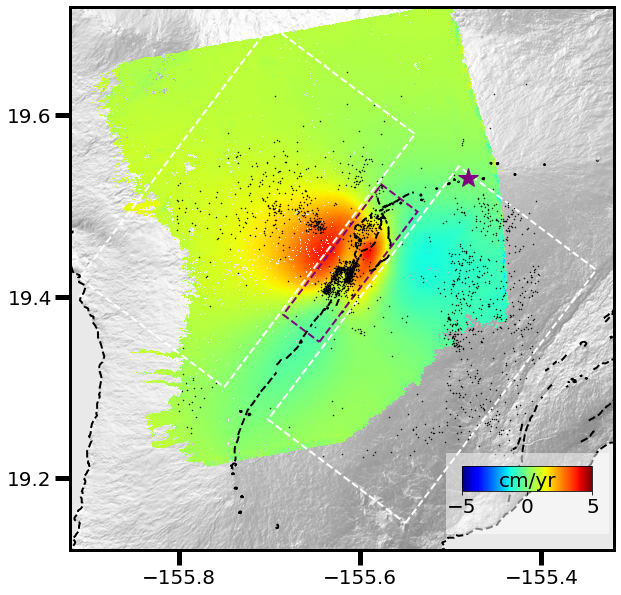

In [51]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111);
ax.tick_params(axis='x',length=15, width=5); ax.tick_params(axis='y',length=15, width=5); 

#plot DEM in background
map_projection='cyl';
m = Basemap(llcrnrlon=geo_box[0], llcrnrlat=geo_box[3],\
            urcrnrlon=geo_box[2], urcrnrlat=geo_box[1],\
            projection= map_projection,\
            resolution='c', area_thresh=1., suppress_ticks=False, ax=ax)
m.imshow(dem_shade, origin='upper', interpolation='spline16')

#plot velocity map
m2 = Basemap(llcrnrlon=data_box[0], llcrnrlat=data_box[3],\
            urcrnrlon=data_box[2], urcrnrlat=data_box[1],\
            projection= map_projection,\
            resolution='c', area_thresh=1., suppress_ticks=False, ax=ax)
img1= m2.imshow(insar_data, origin='upper',cmap='jet',vmin=-5.0, vmax=5.0)

#plot coast and faults
ax.plot(lines['Lllh'][:,0],lines['Lllh'][:,1],color='black', linestyle='dashed',linewidth=2)

#Add reference point
ax.plot(-155.4812,19.5310,'*',markersize=20,color='purple');

#Add siesmicity and bounding boxes
ax.plot(eq_data['longitude'],eq_data['latitude'], 'o', markersize=0.5,color='black')
c1=Rectangle((-155.75,19.3),0.35,0.2,angle=53.0,fill=None,color='white',alpha=1,linestyle='dashed',linewidth=2)
c2=Rectangle((-155.55,19.15),0.35,0.19,angle=53.0,fill=None,color='white',alpha=1,linestyle='dashed',linewidth=2)
c3=Rectangle((-155.645,19.35),0.18,0.05,angle=53.0,fill=None,color='purple',alpha=1,linestyle='dashed',linewidth=2)
plt.gca().add_patch(c1)
plt.gca().add_patch(c2)
plt.gca().add_patch(c3)

#customize plot
ax.set_ylim((19.12,19.72));ax.set_xlim((-155.92,-155.32))
ax.set_xticks([-155.8,-155.6,-155.4]);ax.set_yticks([19.2,19.4,19.6])
ax.tick_params(labelsize=20)
plt.setp(ax.spines.values(), linewidth=3)

#add colorbar with an inset box
cbbox = inset_axes(ax, width='100%', height='50%', loc='lower right',bbox_to_anchor=(0.7, 0.02, 0.3, 0.3),bbox_transform=ax.transAxes)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.set_xticklabels([]);cbbox.set_yticklabels([]);
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', 
                  labelleft='off', labeltop='off', labelright='off', labelbottom='off',
                  length=0,width=0);
cbbox.set_facecolor([1,1,1,0.5])
axins1 = inset_axes(ax,width="80%",height="15%",loc='lower right',bbox_to_anchor=(0.67, 0.1, 0.3, 0.3),bbox_transform=ax.transAxes)
axins1.tick_params(labelsize=20);
cbar=fig.colorbar(img1, cax=axins1, orientation='horizontal',ticks=[-5,0,5]);
cbar.set_label('cm/yr', rotation=0,labelpad=-45,size=20)

#save figure

#plt.savefig('Fig.1a_InSAR_velocity.pdf',dpi=300,bbox_inches='tight',transparent=True)  